### Dataset Description

Rossmann Store Sales dataset will be used. It is a competition held 3 years ago and the dataset is available in Kaggle.
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. 


#### Features

*	**Id** - an Id that represents a (Store, Date) duple within the test set
*	**Store** - a unique Id for each store
*	**Sales** - the turnover for any given day (this is what you are predicting)
*	**Customers** - the number of customers on a given day
*	**Open** - an indicator for whether the store was open: 0 = closed, 1 = open
*	**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
*	**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
*	**StoreType** - differentiates between 4 different store models: a, b, c, d
*	**Assortment** - describes an assortment level: a = basic, b = extra, c = extended
*	**CompetitionDistance** - distance in meters to the nearest competitor store
*	**CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
*	**Promo** - indicates whether a store is running a promo on that day
*	**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
*	**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
*	**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


Link for dataset : https://www.kaggle.com/c/rossmann-store-sales/data


In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
os.chdir(os.getcwd()+'/rossmann-store-sales')

In [3]:
train_df = pd.read_csv('train.csv',parse_dates=["Date"])
train_df.head()

C:\env\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
print(len(train_df))
train_df.dtypes

1017209


Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [5]:
train_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [6]:
train_df.sort_values("Date",inplace=True,ascending=True)
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0,0,0,0,a,1
1016473,379,2,2013-01-01,0,0,0,0,a,1
1016472,378,2,2013-01-01,0,0,0,0,a,1
1016471,377,2,2013-01-01,0,0,0,0,a,1
1016470,376,2,2013-01-01,0,0,0,0,a,1


In [7]:
print(len(train_df[train_df['Sales']==0]))
train_df[train_df['StateHoliday']!='0'].head()

172871


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0,0,0,0,a,1
1016473,379,2,2013-01-01,0,0,0,0,a,1
1016472,378,2,2013-01-01,0,0,0,0,a,1
1016471,377,2,2013-01-01,0,0,0,0,a,1
1016470,376,2,2013-01-01,0,0,0,0,a,1


# Sales Distribution

## Sales distribution of 4 randomly selected stores 

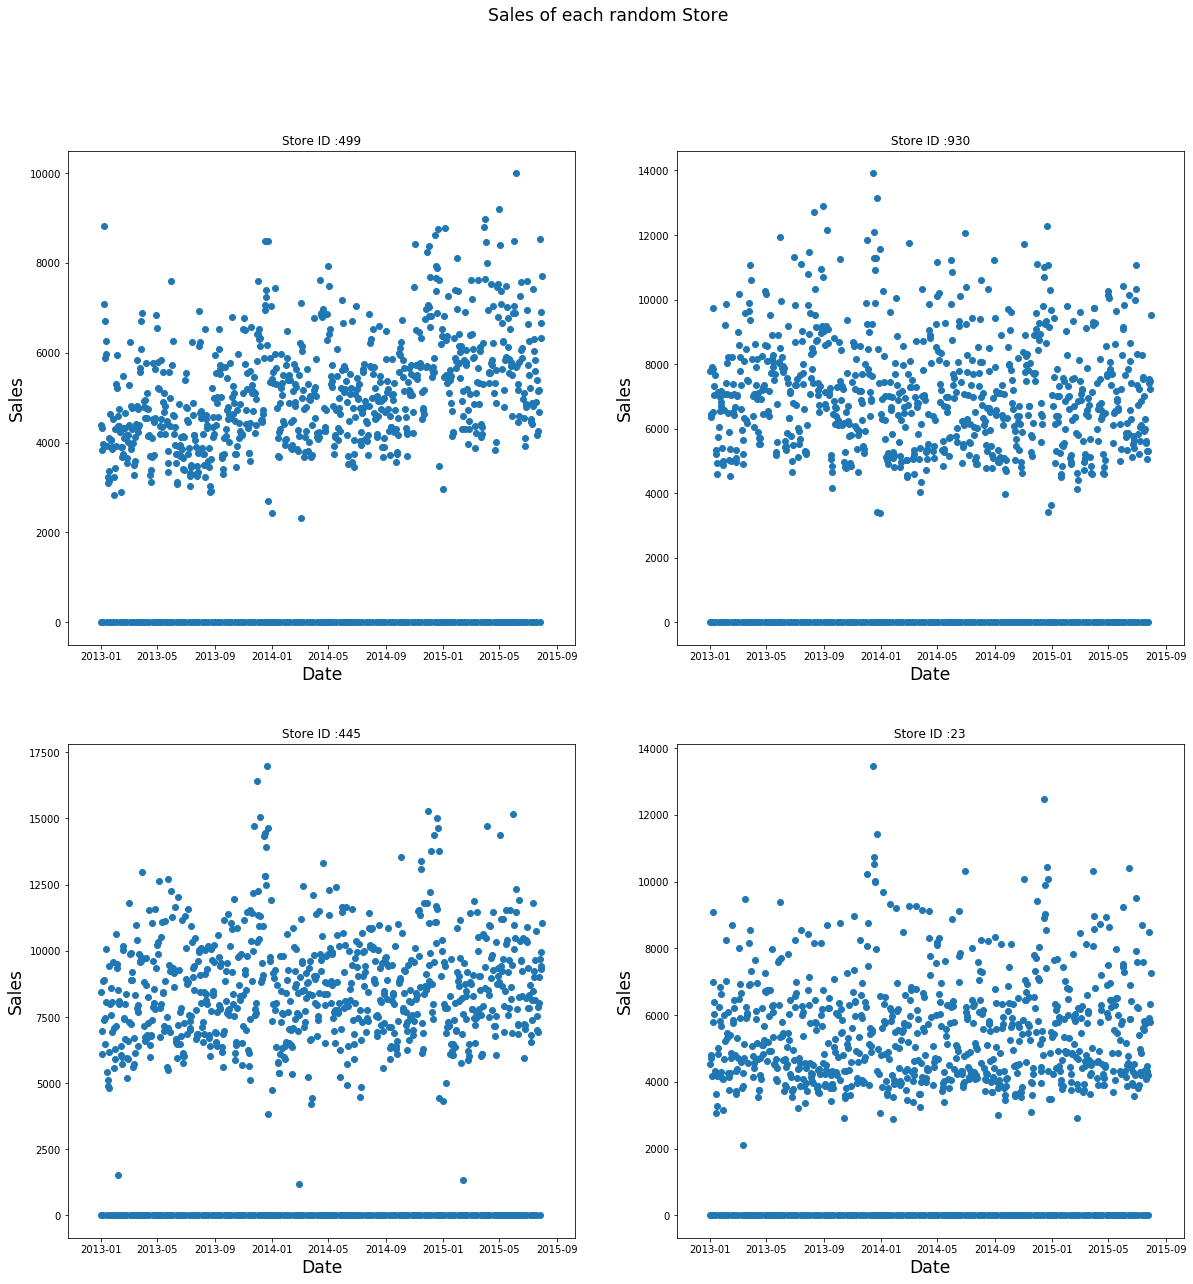

In [8]:
fig, ax = plt.subplots(2, 2,figsize=(20,20))
fig.suptitle('Sales of each random Store', fontsize='xx-large')
for i in range(2):    
    for j in range(2):
        rand_number=np.random.randint(0,1000)
        temp_df = train_df[train_df.Store == rand_number]
        ax[i,j].scatter(temp_df.Date,temp_df.Sales)
        ax[i,j].set_title('Store ID :' + str(rand_number))
        ax[i,j].set_xlabel('Date',fontsize='xx-large');
        ax[i,j].set_ylabel('Sales',fontsize='xx-large');



# Sales Distribution

## Sales distribution of 2 randomly selected stores for promo and no promo 

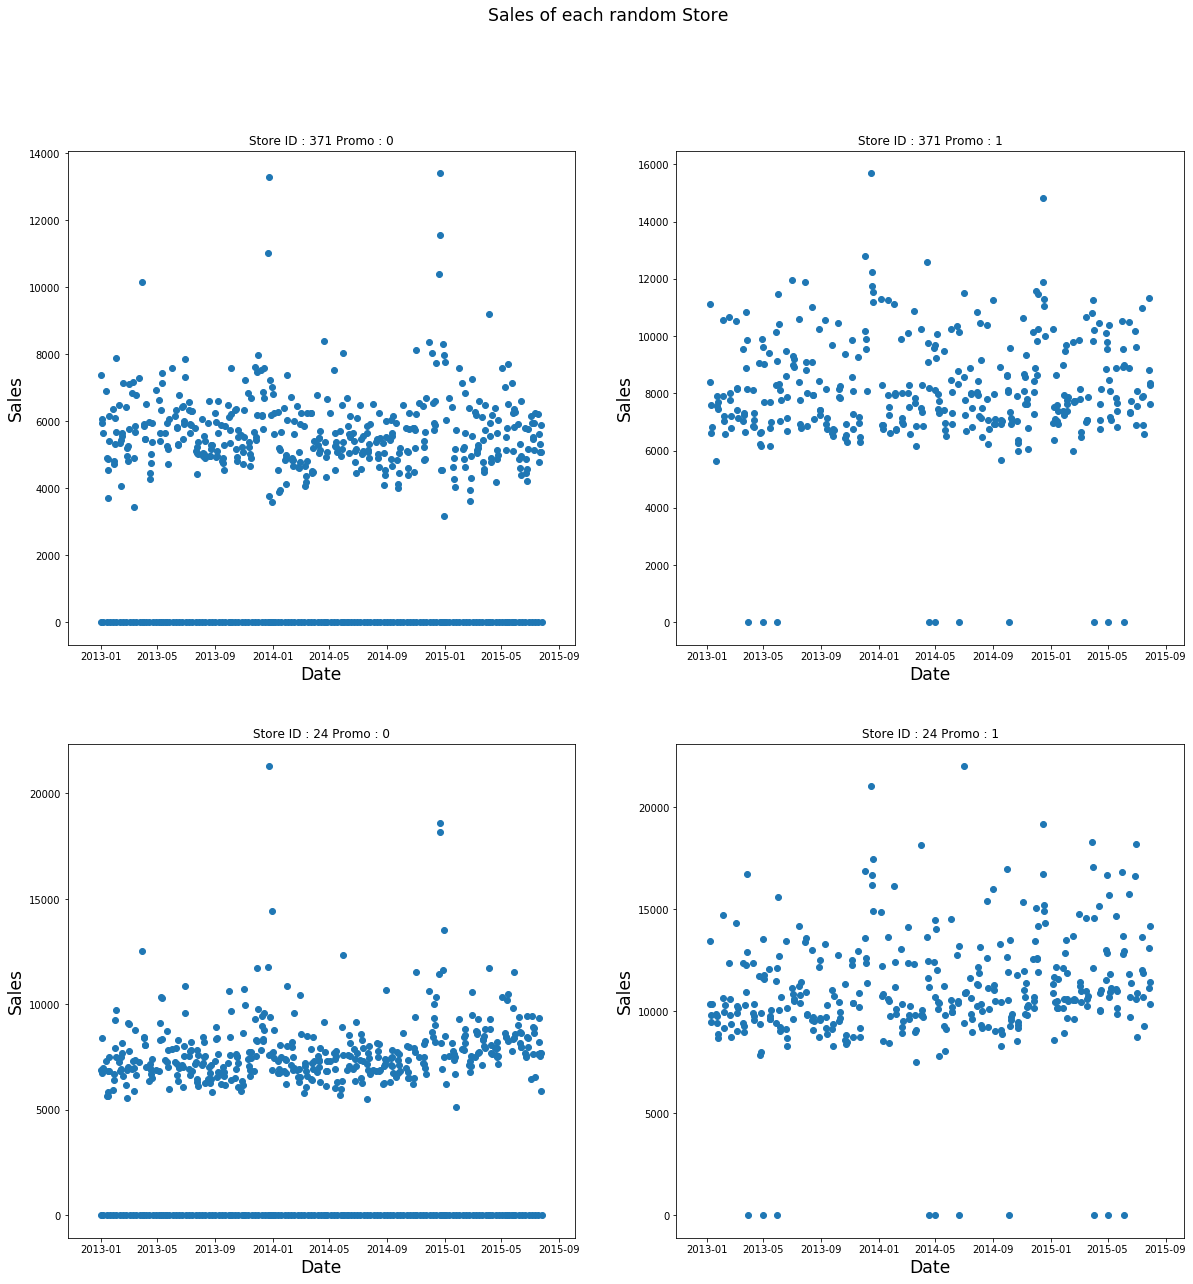

In [9]:
fig, ax = plt.subplots(2, 2,figsize=(20,20))
fig.suptitle('Sales of each random Store', fontsize='xx-large')
for i in range(2):
    rand_number=np.random.randint(0,1000)
    temp2_df = train_df[train_df.Store == rand_number]
    for j in range(2):
        temp_df = temp2_df[temp2_df.Promo == j]
        ax[i,j].scatter(temp_df.Date,temp_df.Sales)
        ax[i,j].set_title('Store ID : ' + str(rand_number) + ' Promo : '+str(j))
        ax[i,j].set_xlabel('Date',fontsize='xx-large');
        ax[i,j].set_ylabel('Sales',fontsize='xx-large');



## Sales distribution of 4 randomly selected stores on a School Holiday

Wall time: 119 ms


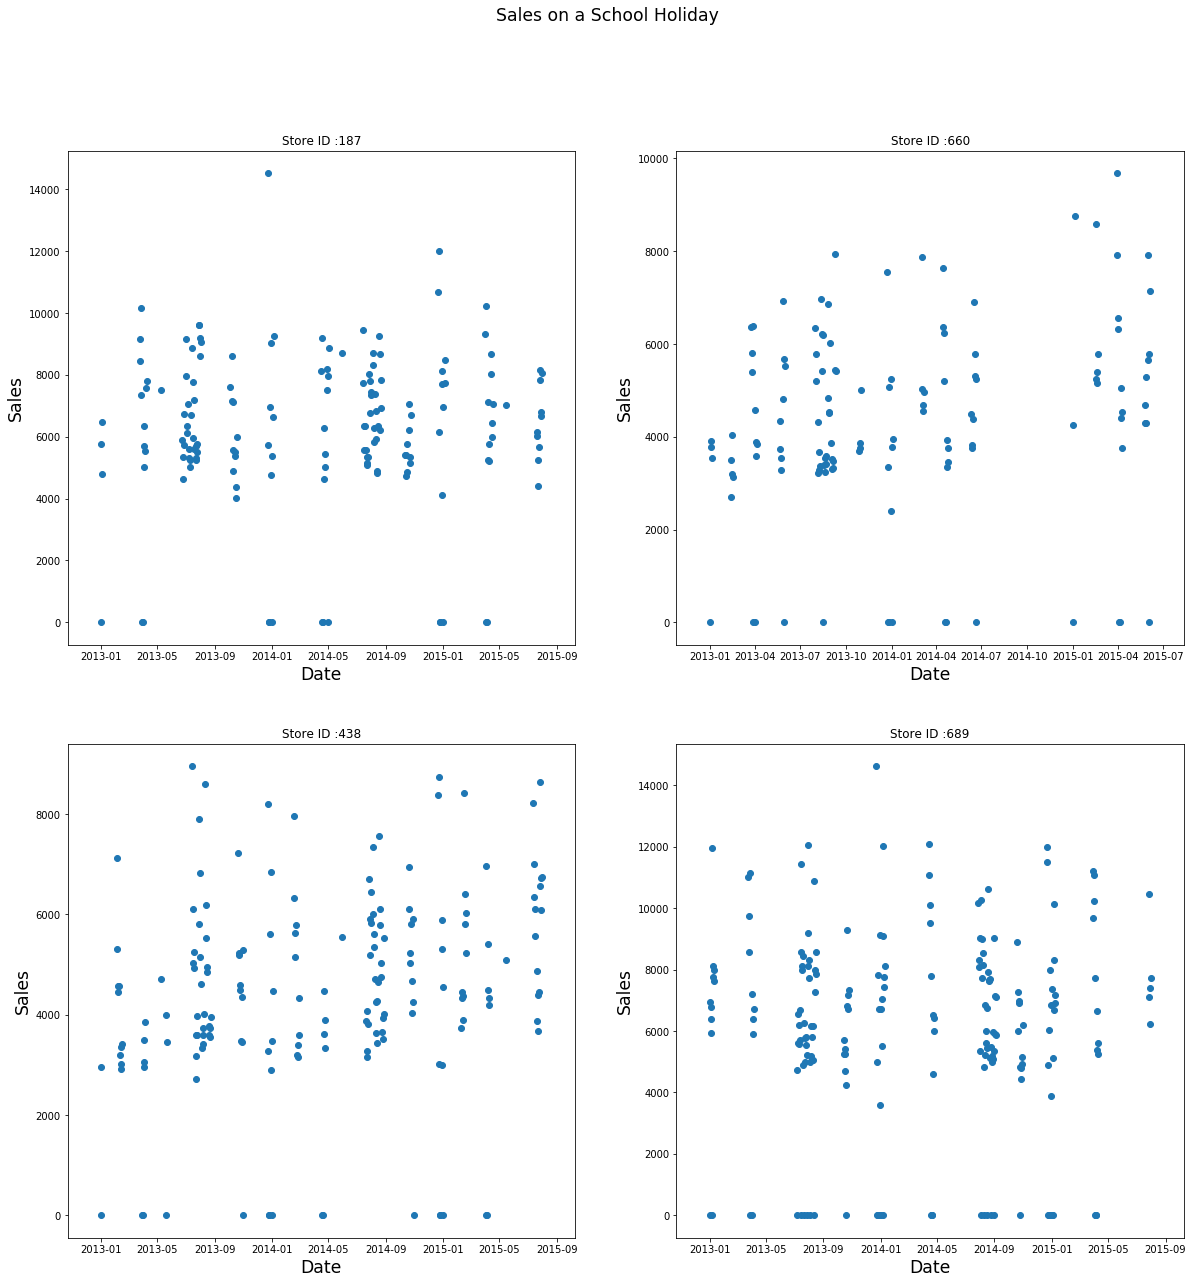

In [10]:
%%time
fig, ax = plt.subplots(2, 2,figsize=(20,20))
fig.suptitle('Sales on a School Holiday', fontsize='xx-large')
for i in range(2):    
    for j in range(2):
        rand_number=np.random.randint(0,1000)
        temp_df = train_df[train_df.Store == rand_number]
        temp_df = temp_df[temp_df['SchoolHoliday'] == 1]
        ax[i,j].scatter(temp_df.Date,temp_df.Sales)
        ax[i,j].set_title('Store ID :' + str(rand_number))
        ax[i,j].set_xlabel('Date',fontsize='xx-large');
        ax[i,j].set_ylabel('Sales',fontsize='xx-large');



## Sales distribution of 4 randomly selected stores on a State Holiday

Wall time: 123 ms


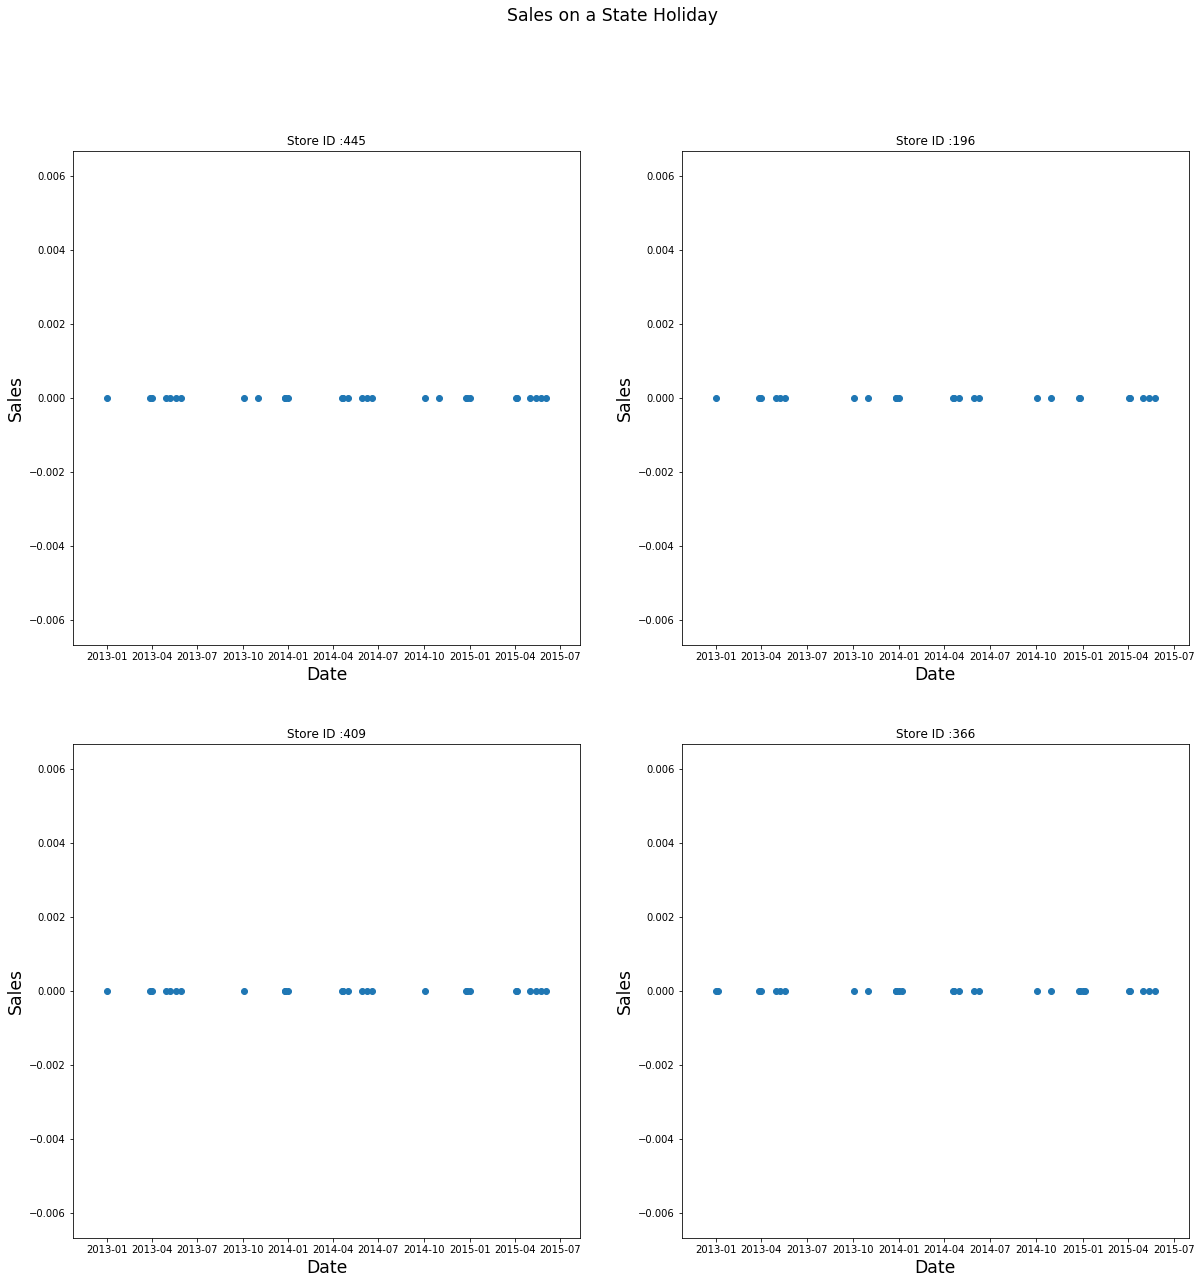

In [11]:
%%time
fig, ax = plt.subplots(2, 2,figsize=(20,20))
fig.suptitle('Sales on a State Holiday', fontsize='xx-large')
for i in range(2):    
    for j in range(2):
        rand_number=np.random.randint(0,1000)
        temp_df = train_df[train_df.Store == rand_number]
        temp_df = temp_df[temp_df['StateHoliday'] != '0']
        temp_df = temp_df[temp_df['StateHoliday'] != 0]
        ax[i,j].scatter(temp_df.Date,temp_df.Sales)
        ax[i,j].set_title('Store ID :' + str(rand_number))
        ax[i,j].set_xlabel('Date',fontsize='xx-large');
        ax[i,j].set_ylabel('Sales',fontsize='xx-large');


##### On a State Holiday there are no sales for all the stores

## Sales distribution of 4 randomly selected stores on Week days

#### DayofWeek:
1. Monday
2. Tuesday
3. Wednesday
4. Thursday
5. Friday
6. Saturday
7. Sunday

Wall time: 142 ms


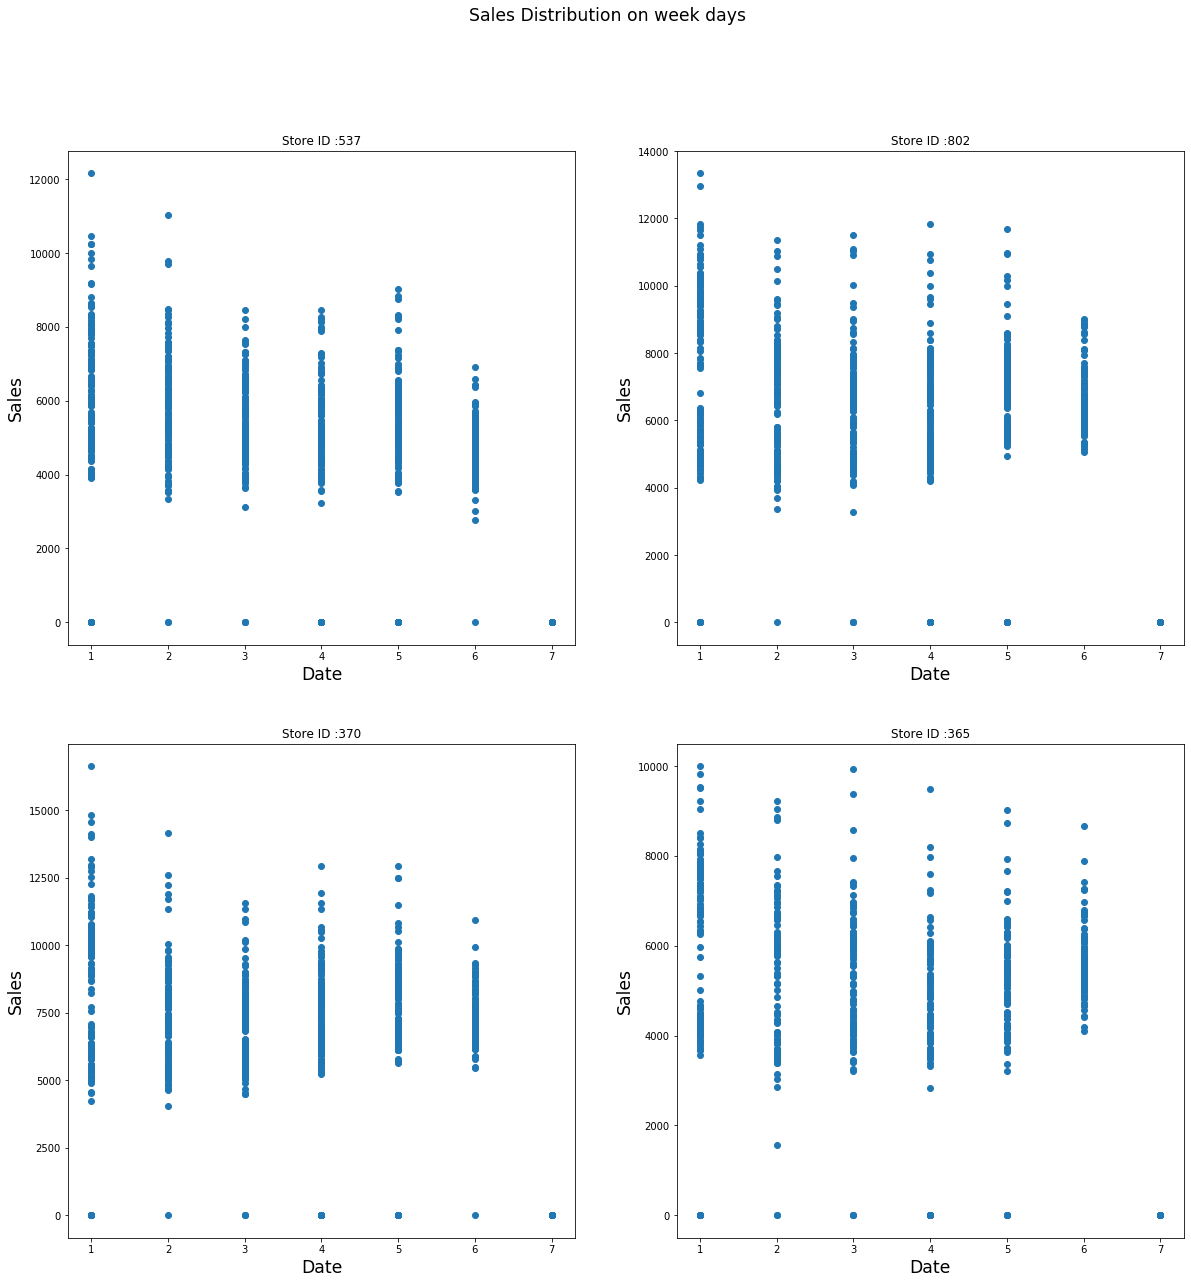

In [12]:
%%time
fig, ax = plt.subplots(2, 2,figsize=(20,20))
fig.suptitle('Sales Distribution on week days', fontsize='xx-large')
for i in range(2):
    for j in range(2):
        rand_number=np.random.randint(0,1000)
        temp_df = train_df[train_df.Store == rand_number]
        ax[i,j].scatter(temp_df.DayOfWeek,temp_df.Sales)
        ax[i,j].set_title('Store ID :' + str(rand_number))
        ax[i,j].set_xlabel('Date',fontsize='xx-large');
        ax[i,j].set_ylabel('Sales',fontsize='xx-large');


In [13]:
df_2=train_df.copy()
df_2["Year"]=train_df.Date.dt.year
df_2["Month"]=train_df.Date.dt.month
df_2["DayofYear"]=train_df.Date.dt.dayofyear
df_2["DayofMonth"]=train_df.Date.dt.day
df_2.drop("Date",axis=1,inplace=True)
df_2.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayofYear,DayofMonth
1017208,1115,2,0,0,0,0,a,1,2013,1,1,1
1016473,379,2,0,0,0,0,a,1,2013,1,1,1
1016472,378,2,0,0,0,0,a,1,2013,1,1,1
1016471,377,2,0,0,0,0,a,1,2013,1,1,1
1016470,376,2,0,0,0,0,a,1,2013,1,1,1


## Sales distribution of 4 randomly selected stores per months

#### Month:
1. Jan
2. Feb
3. Mar
4. Apr
5. May
6. Jun
7. Jul
8. Aug
9. Sep
10. Oct
11. Nov
12. Dec

Wall time: 126 ms


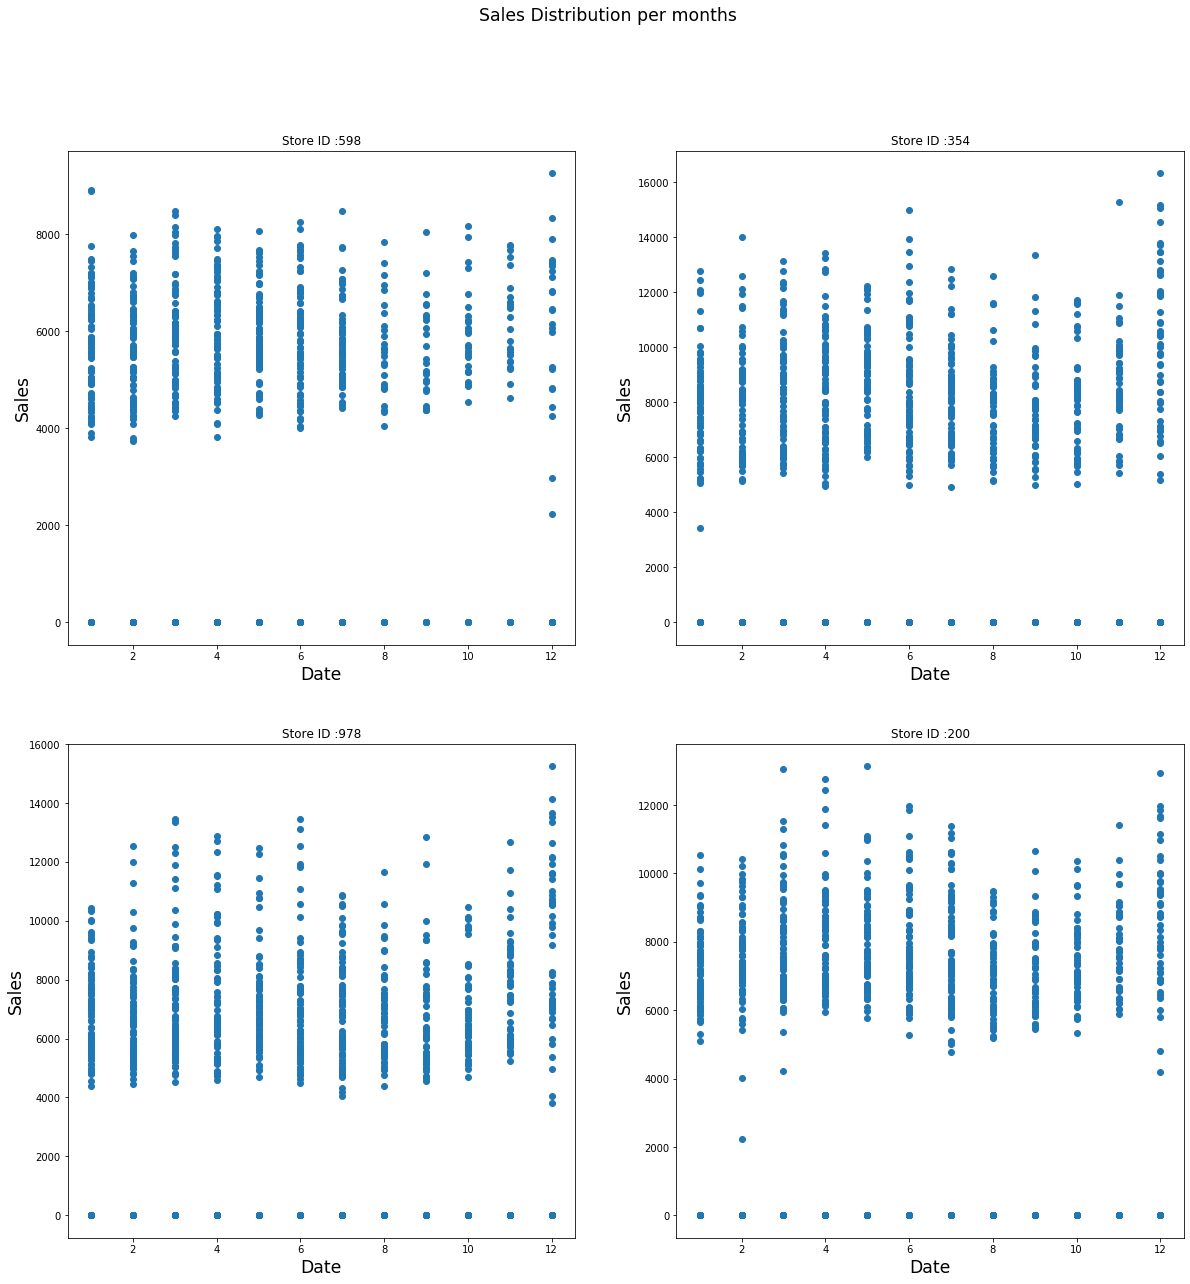

In [14]:
%%time
fig, ax = plt.subplots(2, 2,figsize=(20,20))
fig.suptitle('Sales Distribution per months', fontsize='xx-large')
for i in range(2):
    for j in range(2):
        rand_number=np.random.randint(0,1000)
        temp_df = df_2[df_2.Store == rand_number]
        ax[i,j].scatter(temp_df.Month,temp_df.Sales)
        ax[i,j].set_title('Store ID :' + str(rand_number))
        ax[i,j].set_xlabel('Date',fontsize='xx-large');
        ax[i,j].set_ylabel('Sales',fontsize='xx-large');


# Customers Distribution

## Customer distribution of 4 randomly selected stores 

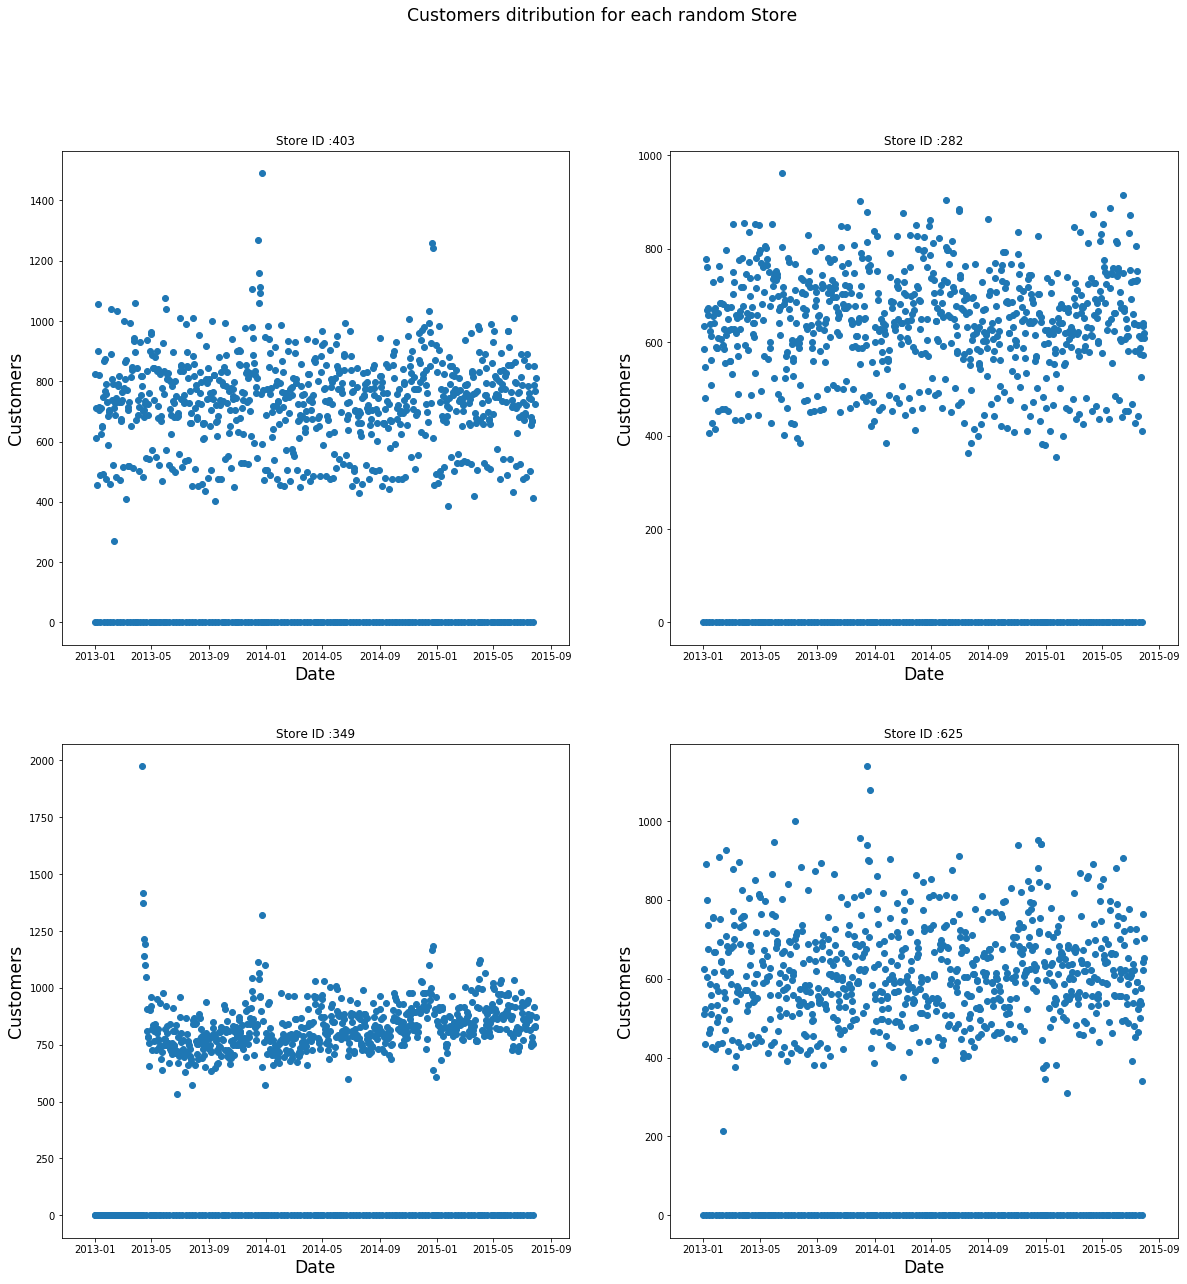

In [15]:
fig, ax = plt.subplots(2, 2,figsize=(20,20))
fig.suptitle('Customers ditribution for each random Store', fontsize='xx-large')
for i in range(2):    
    for j in range(2):
        rand_number=np.random.randint(0,1000)
        temp_df = train_df[train_df.Store == rand_number]
        ax[i,j].scatter(temp_df.Date,temp_df.Customers)
        ax[i,j].set_title('Store ID :' + str(rand_number))
        ax[i,j].set_xlabel('Date',fontsize='xx-large');
        ax[i,j].set_ylabel('Customers',fontsize='xx-large');



## Sales distribution of 4 randomly selected stores on a School Holiday

Wall time: 121 ms


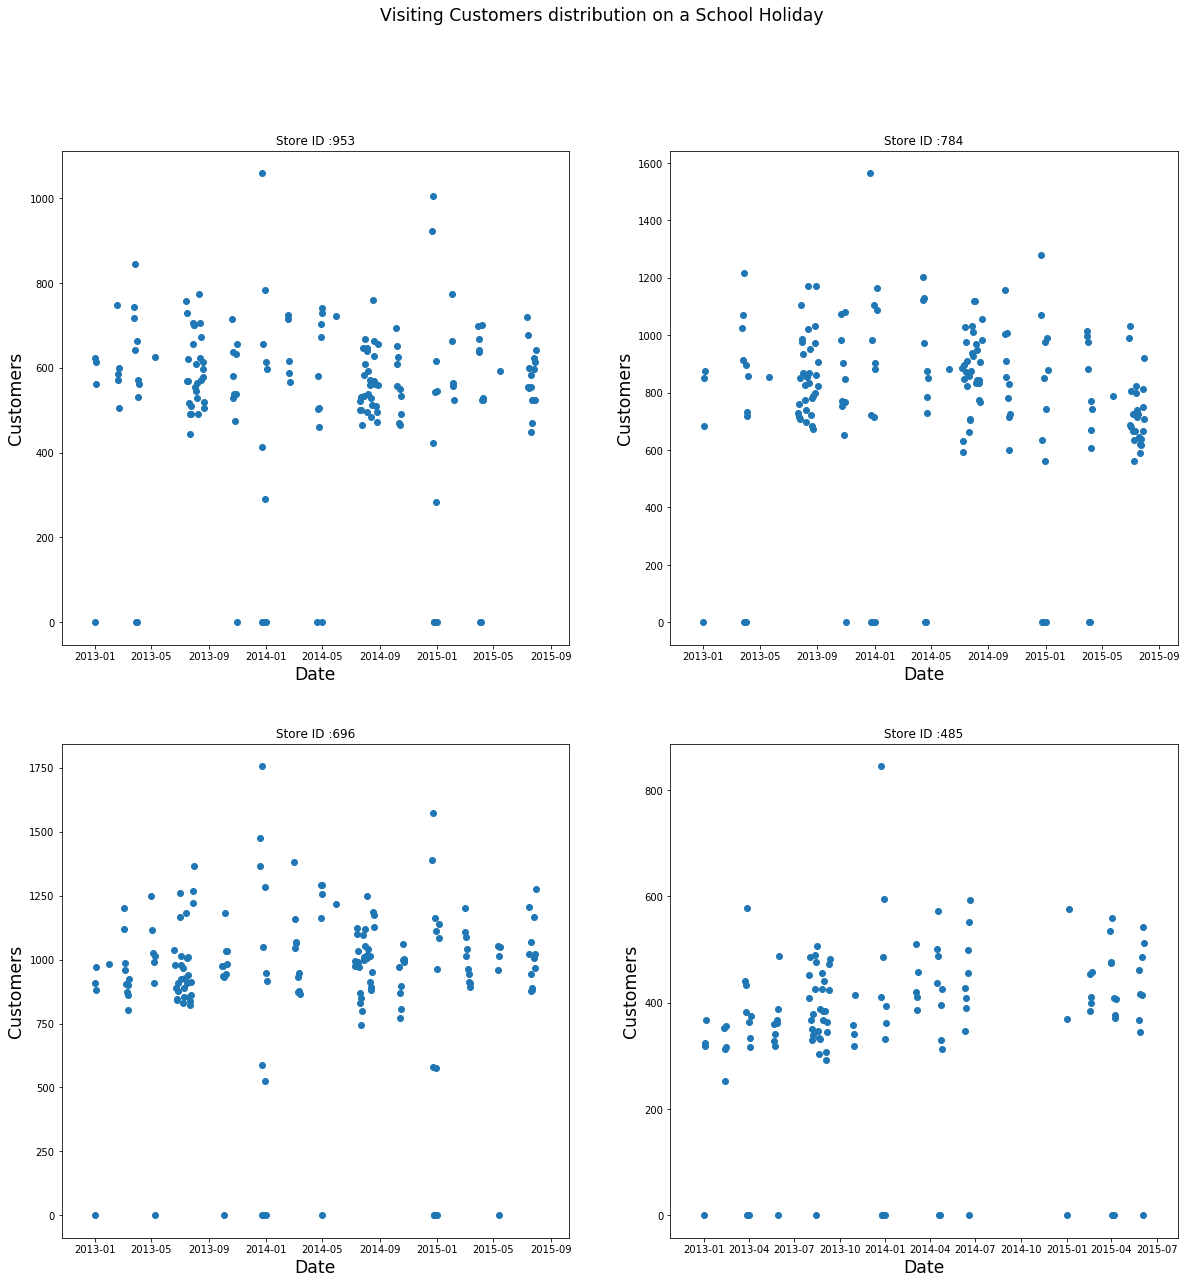

In [16]:
%%time
fig, ax = plt.subplots(2, 2,figsize=(20,20))
fig.suptitle('Visiting Customers distribution on a School Holiday', fontsize='xx-large')
for i in range(2):    
    for j in range(2):
        rand_number=np.random.randint(0,1000)
        temp_df = train_df[train_df.Store == rand_number]
        temp_df = temp_df[temp_df['SchoolHoliday'] == 1]
        ax[i,j].scatter(temp_df.Date,temp_df.Customers)
        ax[i,j].set_title('Store ID :' + str(rand_number))
        ax[i,j].set_xlabel('Date',fontsize='xx-large');
        ax[i,j].set_ylabel('Customers',fontsize='xx-large');



## Customers distribution of 4 randomly selected stores on Week days

#### DayofWeek:
1. Monday
2. Tuesday
3. Wednesday
4. Thursday
5. Friday
6. Saturday
7. Sunday

Wall time: 116 ms


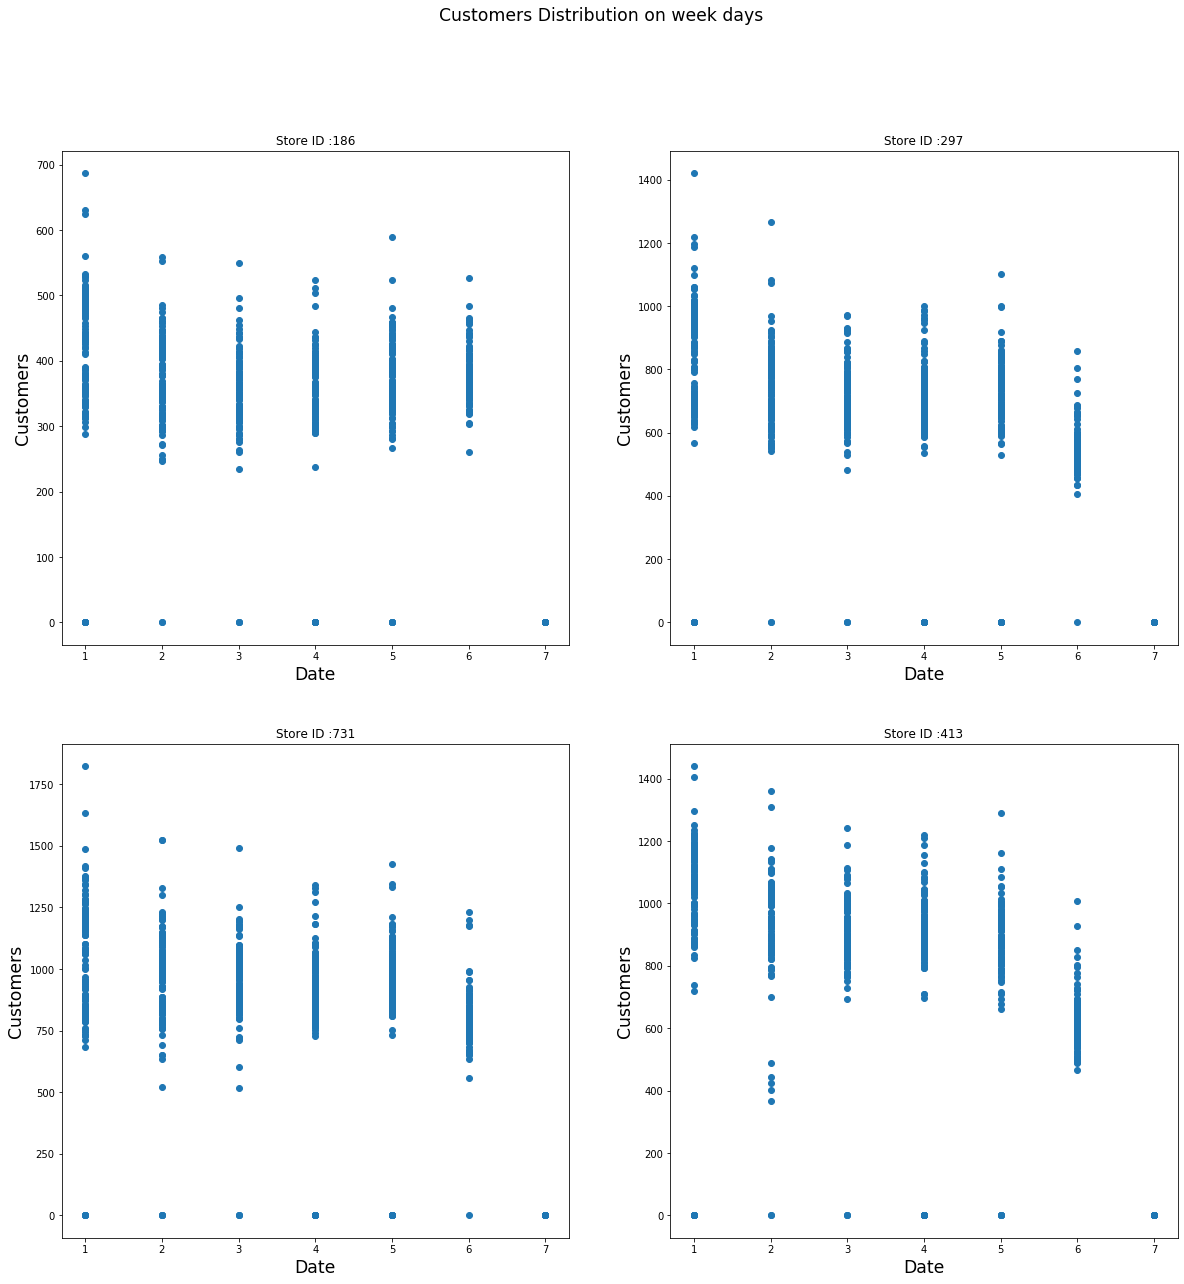

In [17]:
%%time
fig, ax = plt.subplots(2, 2,figsize=(20,20))
fig.suptitle('Customers Distribution on week days', fontsize='xx-large')
for i in range(2):
    for j in range(2):
        rand_number=np.random.randint(0,1000)
        temp_df = train_df[train_df.Store == rand_number]
        ax[i,j].scatter(temp_df.DayOfWeek,temp_df.Customers)
        ax[i,j].set_title('Store ID :' + str(rand_number))
        ax[i,j].set_xlabel('Date',fontsize='xx-large');
        ax[i,j].set_ylabel('Customers',fontsize='xx-large');


## Customers distribution of 4 randomly selected stores per months

#### Month:
1. Jan
2. Feb
3. Mar
4. Apr
5. May
6. Jun
7. Jul
8. Aug
9. Sep
10. Oct
11. Nov
12. Dec

Wall time: 128 ms


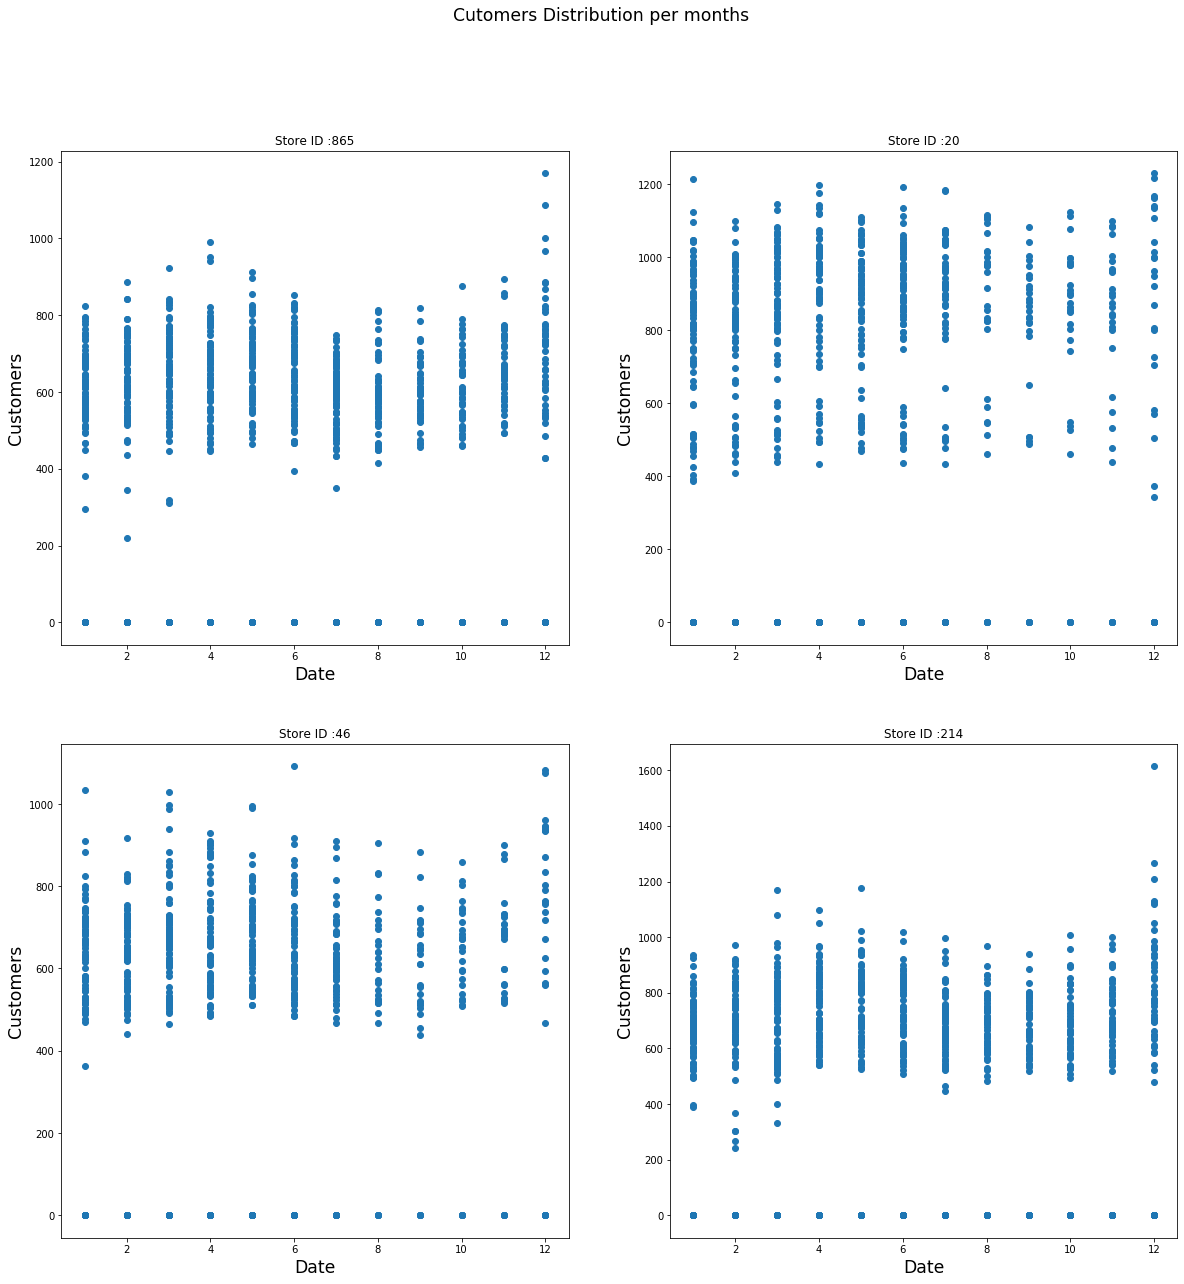

In [18]:
%%time
fig, ax = plt.subplots(2, 2,figsize=(20,20))
fig.suptitle('Cutomers Distribution per months', fontsize='xx-large')
for i in range(2):
    for j in range(2):
        rand_number=np.random.randint(0,1000)
        temp_df = df_2[df_2.Store == rand_number]
        ax[i,j].scatter(temp_df.Month,temp_df.Customers)
        ax[i,j].set_title('Store ID :' + str(rand_number))
        ax[i,j].set_xlabel('Date',fontsize='xx-large');
        ax[i,j].set_ylabel('Customers',fontsize='xx-large');


In [19]:
df_2.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayofYear,DayofMonth
1017208,1115,2,0,0,0,0,a,1,2013,1,1,1
1016473,379,2,0,0,0,0,a,1,2013,1,1,1
1016472,378,2,0,0,0,0,a,1,2013,1,1,1
1016471,377,2,0,0,0,0,a,1,2013,1,1,1
1016470,376,2,0,0,0,0,a,1,2013,1,1,1


In [20]:
final_df1 = train_df[train_df['StateHoliday'] == 0]
final_df2 = train_df[train_df['StateHoliday'] == '0']
final_df_ = pd.concat([final_df1,final_df2],axis = 0)
final_df_ = final_df_[final_df_['DayOfWeek'] != 7]
#final_df_ = pd.concat([final_df_,final_df3],axis = 0)
final_df_.sort_values("Date",inplace=True,ascending=True)

final_df=final_df_.copy()
final_df["Year"]=final_df_.Date.dt.year
final_df["Month"]=final_df_.Date.dt.month
final_df["DayofYear"]=final_df_.Date.dt.dayofyear
final_df["DayofMonth"]=final_df_.Date.dt.day
final_df["WeekofYear"]=final_df_.Date.dt.weekofyear
final_df.drop(['Date','StateHoliday'],axis=1,inplace=True)
final_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,DayofYear,DayofMonth,WeekofYear
1015350,371,3,7374,606,1,0,1,2013,1,2,2,1
1016091,1112,3,10797,892,1,0,1,2013,1,2,2,1
1016090,1111,3,5097,505,1,0,1,2013,1,2,2,1
1016089,1110,3,4126,507,1,0,1,2013,1,2,2,1
1016088,1109,3,4576,444,1,0,1,2013,1,2,2,1


In [21]:
tempo_df = final_df[['Store','DayofMonth','Year','DayofYear']]
tempo_df.head()

,Store,DayofMonth,Year,DayofYear
1015350,371,2,2013,2
1016091,1112,2,2013,2
1016090,1111,2,2013,2
1016089,1110,2,2013,2
1016088,1109,2,2013,2


### Summary:
1. On State hoday, the stores are closed, so all the rows with state holiday can be deleted and the state holiday column can be deleted.
2. All the Stores are closed on Sunday
3. Sales are higher when on the day with Promos.
4. Sales are higher in the month of december.

## Store dataset Feature Engineering

In [22]:
final_df.Year.value_counts

<bound method IndexOpsMixin.value_counts of 1015350    2013
1016091    2013
1016090    2013
1016089    2013
1016088    2013
           ... 
4          2015
3          2015
2          2015
7          2015
0          2015
Name: Year, Length: 841738, dtype: int64>

In [23]:
store_df = pd.read_csv('store.csv')
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [24]:
len(store_df)

1115

In [25]:
store_df.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [26]:
Month_dict = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
month_list = []
for key,item in Month_dict.items():
    month_list.append('Promo_2_month_'+str(item))
len(month_list)

12

In [27]:
len(store_df)

1115

def get_promo_month(row):
    string = row['PromoInterval']
    A = [Month_dict.get(mon) for mon in string.split(',')]
    for i in A:
        row['Promo_2_month_'+str(i)] = 1

In [28]:
def get_promo_month(string):
    month_list = [int(0)]*12
    try:
        A = [Month_dict.get(mon) for mon in string.split(',')]
        for i in A:
            month_list[i-1] = int(1)
        return month_list
    except:
        return month_list
def form_new_columns(row):
    for i in range(12):
        row['Promo_2_month_'+str(i+1)] = row['PromoInterval'][i]

In [29]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [30]:
store_df['Promo_months'] = store_df['PromoInterval'].apply(get_promo_month)
#store_df.apply(lambda x: x.apply(get_promo_month,axis=1), axis=0)

In [31]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Promo_months
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct","[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct","[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [32]:
for i in range(12):
    col_name = 'Promo_2_month_'+str(i+1)
    store_df[col_name] = 0

In [33]:
for i in range(12):
    col_name = 'Promo_2_month_'+str(i+1)
    for index,row in store_df.iterrows():
        store_df.loc[index,col_name] = row['Promo_months'][i]

In [34]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Promo_2_month_3,Promo_2_month_4,Promo_2_month_5,Promo_2_month_6,Promo_2_month_7,Promo_2_month_8,Promo_2_month_9,Promo_2_month_10,Promo_2_month_11,Promo_2_month_12
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",...,0,1,0,0,1,0,0,1,0,0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",...,0,1,0,0,1,0,0,1,0,0
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


### Combining both the files for further analysis

In [35]:
Combined_df = final_df.merge(store_df,how='left',on='Store')

In [36]:
Combined_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,DayofYear,...,Promo_2_month_3,Promo_2_month_4,Promo_2_month_5,Promo_2_month_6,Promo_2_month_7,Promo_2_month_8,Promo_2_month_9,Promo_2_month_10,Promo_2_month_11,Promo_2_month_12
0,371,3,7374,606,1,0,1,2013,1,2,...,0,0,1,0,0,1,0,0,1,0
1,1112,3,10797,892,1,0,1,2013,1,2,...,0,0,0,0,0,0,0,0,0,0
2,1111,3,5097,505,1,0,1,2013,1,2,...,0,1,0,0,1,0,0,1,0,0
3,1110,3,4126,507,1,0,1,2013,1,2,...,0,0,0,0,0,0,0,0,0,0
4,1109,3,4576,444,1,0,1,2013,1,2,...,0,1,0,0,1,0,0,1,0,0


### Combined dataset feature engineering

In [37]:
Combined_df['hasPromo2'] = np.where((Combined_df.Promo2 == 1) & (Combined_df['Year'] >= Combined_df['Promo2SinceYear']) &
                                   (Combined_df['WeekofYear'] >= Combined_df['Promo2SinceWeek']), 1, 0)

In [38]:
Combined_df['hasPromo2'] .value_counts()

0    646097
1    195641
Name: hasPromo2, dtype: int64

In [39]:
for i in range(1,13):
    col_name = 'Promo_2_month_'+str(i)
    temp_df = Combined_df[Combined_df['hasPromo2'] == 1][Combined_df['Month'] == i][Combined_df[col_name] == 0]
    print(len(temp_df))
    for index,row in temp_df.iterrows():
        Combined_df.loc[index,'hasPromo2'] = 0

<ipython-input-39-62968e15b64b>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = Combined_df[Combined_df['hasPromo2'] == 1][Combined_df['Month'] == i][Combined_df[col_name] == 0]


703
3141
7713
5678
14346
17343
10081
11689
18564
8788
15658
19354


In [40]:
Combined_df['hasPromo2'] .value_counts()

0    779155
1     62583
Name: hasPromo2, dtype: int64

In [42]:
Combined_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,DayofYear,...,Promo_2_month_4,Promo_2_month_5,Promo_2_month_6,Promo_2_month_7,Promo_2_month_8,Promo_2_month_9,Promo_2_month_10,Promo_2_month_11,Promo_2_month_12,hasPromo2
0,371,3,7374,606,1,0,1,2013,1,2,...,0,1,0,0,1,0,0,1,0,0
1,1112,3,10797,892,1,0,1,2013,1,2,...,0,0,0,0,0,0,0,0,0,0
2,1111,3,5097,505,1,0,1,2013,1,2,...,1,0,0,1,0,0,1,0,0,0
3,1110,3,4126,507,1,0,1,2013,1,2,...,0,0,0,0,0,0,0,0,0,0
4,1109,3,4576,444,1,0,1,2013,1,2,...,1,0,0,1,0,0,1,0,0,0


In [43]:
Combined_df.keys()

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'Year', 'Month', 'DayofYear', 'DayofMonth',
       'WeekofYear', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Promo_months',
       'Promo_2_month_1', 'Promo_2_month_2', 'Promo_2_month_3',
       'Promo_2_month_4', 'Promo_2_month_5', 'Promo_2_month_6',
       'Promo_2_month_7', 'Promo_2_month_8', 'Promo_2_month_9',
       'Promo_2_month_10', 'Promo_2_month_11', 'Promo_2_month_12',
       'hasPromo2'],
      dtype='object')

In [44]:
Combined_df['IsCompetitionOpen'] = np.where((Combined_df.Year >= Combined_df.CompetitionOpenSinceYear) & (Combined_df.Month >= Combined_df.CompetitionOpenSinceMonth), 1, 0)

In [45]:
Combined_df.keys()

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'Year', 'Month', 'DayofYear', 'DayofMonth',
       'WeekofYear', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Promo_months',
       'Promo_2_month_1', 'Promo_2_month_2', 'Promo_2_month_3',
       'Promo_2_month_4', 'Promo_2_month_5', 'Promo_2_month_6',
       'Promo_2_month_7', 'Promo_2_month_8', 'Promo_2_month_9',
       'Promo_2_month_10', 'Promo_2_month_11', 'Promo_2_month_12', 'hasPromo2',
       'IsCompetitionOpen'],
      dtype='object')

In [46]:
cols = ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'Year', 'Month', 'DayofYear', 'WeekofYear',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'Promo2','hasPromo2', 'IsCompetitionOpen']

In [47]:
Preprocessed_df =pd.DataFrame([])
for col in cols:
    Preprocessed_df[col] = Combined_df[col]

In [48]:
Preprocessed_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,DayofYear,WeekofYear,StoreType,Assortment,CompetitionDistance,Promo2,hasPromo2,IsCompetitionOpen
0,371,3,7374,606,1,0,1,2013,1,2,1,d,c,1970.0,1,0,0
1,1112,3,10797,892,1,0,1,2013,1,2,1,c,c,1880.0,0,0,0
2,1111,3,5097,505,1,0,1,2013,1,2,1,a,a,1900.0,1,0,0
3,1110,3,4126,507,1,0,1,2013,1,2,1,c,c,900.0,0,0,0
4,1109,3,4576,444,1,0,1,2013,1,2,1,c,a,3490.0,1,0,0


In [49]:
Preprocessed_df = Preprocessed_df.merge(tempo_df,how='left',on=['Store','Year','DayofYear'])

In [50]:
Preprocessed_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,DayofYear,WeekofYear,StoreType,Assortment,CompetitionDistance,Promo2,hasPromo2,IsCompetitionOpen,DayofMonth
0,371,3,7374,606,1,0,1,2013,1,2,1,d,c,1970.0,1,0,0,2
1,1112,3,10797,892,1,0,1,2013,1,2,1,c,c,1880.0,0,0,0,2
2,1111,3,5097,505,1,0,1,2013,1,2,1,a,a,1900.0,1,0,0,2
3,1110,3,4126,507,1,0,1,2013,1,2,1,c,c,900.0,0,0,0,2
4,1109,3,4576,444,1,0,1,2013,1,2,1,c,a,3490.0,1,0,0,2


In [61]:
from pathlib import Path
a = str(Path(os.getcwd()).parent.parent)

In [62]:
Preprocessed_df.to_csv(a+'/ML Modeling and evaluation/Pre_processed_data.csv',index=None)

**Preprocessed dataset is saved into a csv file for model preperation**